# Pb 1

In [1]:
import numpy as np

In [2]:
n = 10
d = 100
w = np.random.standard_normal(size=(1, d))

In [3]:
X = np.random.standard_normal(size=(d, n))
y= np.matmul(w, X)

## (a)

In [4]:
w_est = np.matmul(y, np.linalg.pinv(X))

## (b)

In [5]:
mse = ((w - w_est)**2).mean()

In [6]:
mse

0.8250951235003025

## (c)

In [7]:
# abstraction
def compute_mse(n):
    d = 100
    X = np.random.standard_normal(size=(d, n))
    y= np.matmul(w, X)
    w_est = np.matmul(y, np.linalg.pinv(X))
    return ((w - w_est)**2).mean()

In [8]:
N = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [9]:
MSE = []
for n in N:
    MSE.append(compute_mse(n))

In [10]:
MSE

[0.9277539564678595,
 0.7437068145091122,
 0.7042780306298541,
 0.7347823230913738,
 0.5331024071385848,
 0.4724502350046142,
 0.3821348459236162,
 0.23908942896346883,
 0.21995934892598967,
 0.07037114156651637]

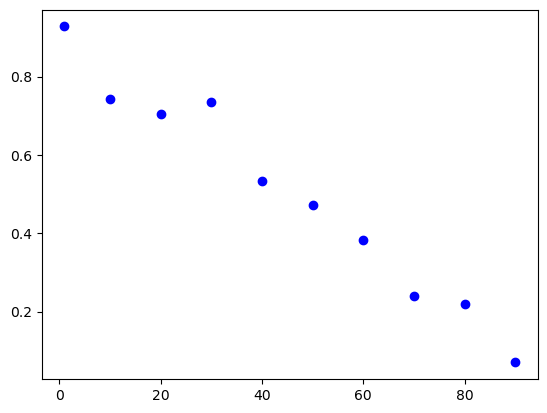

In [11]:
import matplotlib.pyplot as plt
plt.scatter(N, MSE, c ="blue")

## (d)

In [12]:
# repeat 30 times
seeds = [i for i in range(30)]
repeat = 30

MSE_AVG = []
for n in N:
    MSE = []
    for seed in seeds:
        np.random.seed(seed)
        MSE.append(compute_mse(n))
    MSE_AVG.append(np.mean(MSE))       

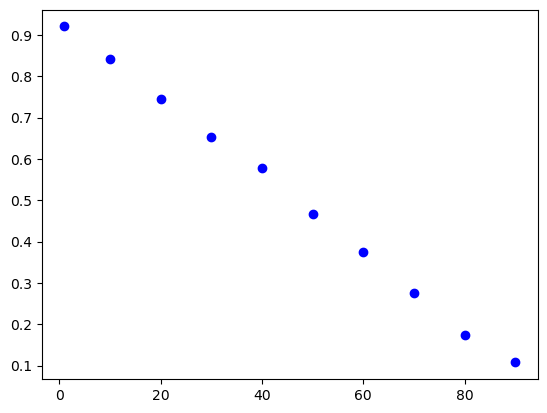

In [13]:
import matplotlib.pyplot as plt
plt.scatter(N, MSE_AVG, c ="blue")

## (e)

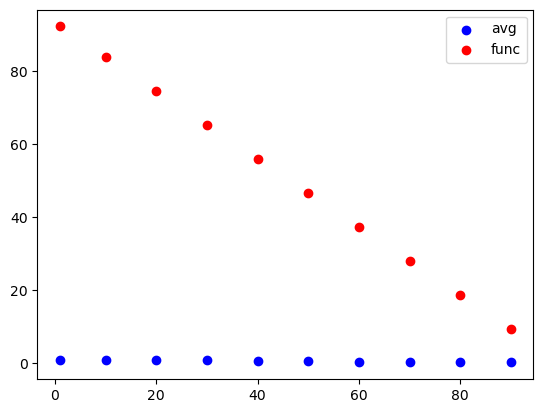

In [14]:
F = []
for n in N:
    F.append(np.inner(w, w)*(1-n/100))
plt.scatter(N, MSE_AVG, c ="blue", label="avg")
plt.scatter(N, F, c ="red", label="func")
plt.legend()

## Pb 5

In [15]:
f = lambda x : x**2+x+1

n_train = 11
X_train = np.linspace(-1, 1, num=n_train)
Y_train = [f(x) for x in X_train]

## (a)

In [16]:
from numpy.linalg import norm, solve

n_test = 1000
X_test = np.linspace(-1, 1, num=n_test)
Y_test = [f(x) for x in X_test]

def gaussian_kernel(x1, x2, L=10):
    return np.exp(-L*norm([x1 - x2], ord=2)**2)

L = [0.01, 0.05, 1, 10, 100]
pred = {}
for l in L:
    # step 1: construct K using X_train
    K = np.zeros((n_train, n_train))
    for i in range(n_train):
        for j in range(n_train):
            K[i, j] = gaussian_kernel(X_train[i], X_train[j], L=l)
    # step 2: solve for getting alpha
    alpha = solve(K, Y_train)
    
    # step 3: compute K for pred
    k = np.zeros((n_test, n_train))
    for i in range(n_test):
        for j in range(n_train):
            k[i, j] = gaussian_kernel(X_test[i], X_train[j], L=l)
            
    # step 4: Compute f(x) = alpha * k
    pred[l] = k @ alpha 

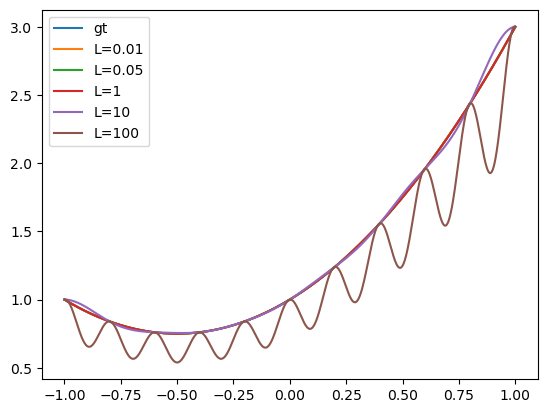

In [17]:
plt.plot(X_test, Y_test, label="gt")
for l in L:
    plt.plot(X_test, pred[l], label=f"L={l}")
plt.legend()

## (b) 

In [18]:
def gaussian_kernel_no_square(x1, x2, L=10):
    return np.exp(-L*norm([x1 - x2], ord=2))

L = [0.01, 0.05, 1, 10, 100]
pred = {}
for l in L:
    # step 1: construct K using X_train
    K = np.zeros((n_train, n_train))
    for i in range(n_train):
        for j in range(n_train):
            K[i, j] = gaussian_kernel_no_square(X_train[i], X_train[j], L=l)
    # step 2: solve for getting alpha
    alpha = solve(K, Y_train)
    
    # step 3: compute K for pred
    k = np.zeros((n_test, n_train))
    for i in range(n_test):
        for j in range(n_train):
            k[i, j] = gaussian_kernel_no_square(X_test[i], X_train[j], L=l)
            
    # step 4: Compute f(x) = alpha * k
    pred[l] = k @ alpha

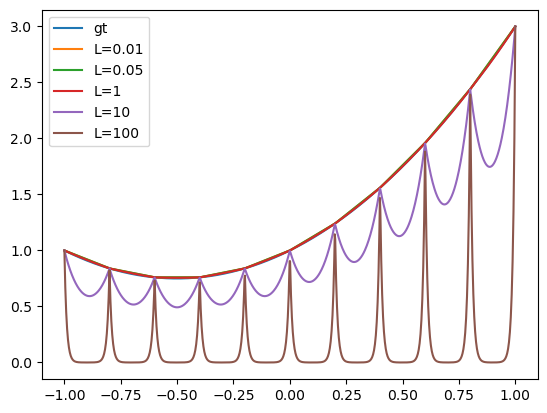

In [19]:
plt.plot(X_test, Y_test, label="gt")
for l in L:
    plt.plot(X_test, pred[l], label=f"L={l}")
plt.legend()